In [1]:
from subpred.protein_go_datasets import get_transmembrane_transporter_dataset, get_stats

## Parameters

In [2]:
ORGANISMS = [3702]  # athaliana 3702 yeast 559292 human 9606 ecoli 83333
GO_TERMS_CLASSES = [
    "sugar transmembrane transporter activity",
    "amino acid transmembrane transporter activity",
]
IDENTITY_THRESHOLD = 70
TEST_NAME = "svc_at_sugaramino"
# TODO pathlib
FEATURES_FOLDER = "../data/tmp_data/"  # to share between environments
RESULTS_FOLDER = "../data/results/"
RECALCULATE_RESULTS = True  # If false, use cached results, e.g. to create more plots

## Full dataset

In [3]:
# Get full dataset for stats. Dataset for analysis is created in cell below.
dataset_unfiltered = get_transmembrane_transporter_dataset( 
    organism_ids=ORGANISMS,
    swissprot_only=False,
    datasets_path="../data/datasets/",
    exclude_iea_go_terms=False,
    max_sequence_evidence_code=2,
    remove_proteins_without_gene_names=False,
)
get_stats(*dataset_unfiltered)

cd-hit: clustered 1773 sequences into 646 clusters at threshold 50
cd-hit: clustered 1773 sequences into 923 clusters at threshold 70
cd-hit: clustered 1773 sequences into 1203 clusters at threshold 90
cd-hit: clustered 1773 sequences into 1554 clusters at threshold 100


n_transporters  \
swissprot_reviewed has_gene_name go_evidence   protein_existence_evidence clustering                   
False              False         computational protein_level              100                      3   
                                                                          None                     3   
                                               transcript_level           50                       3   
                                                                          70                       4   
                                                                          90                       7   
                                                                          100                     37   
                                                                          None                    49   
                   True          computational protein_level              50                      87   
                                                                          70                     114   
                                                                          90                     153   
                                                                          100                    329   
                                                                          None                   433   
                                               transcript_level           50                       7   
                                                                          70                      13   
                                                                          90                      19   
                                                                          100                     84   
                                                                          None                   164   
                                 experiment    protein_level              50                      25   
                                                                          70                      33   
                                                                          90                      38   
                                                                          100                     41   
                                                                          None                    42   
                                               transcript_level           50                       3   
                                                                          70                       5   
                                                                          90                       5   
                                                                          100                      6   
                                                                          None                     6   
True               True          computational protein_level              50                     206   
                                                                          70                     287   
                                                                          90                     370   
                                                                          100                    408   
                                                                          None                   418   
                                               transcript_level           50                     208   
                                                                          70                     338   
                                                                          90                     462   
                                                                          100                    492   
                                                                          None                   504   
                              

## Filtered Subset

In [4]:
dataset_organism = get_transmembrane_transporter_dataset(  # organism
    organism_ids=ORGANISMS,
    swissprot_only=True,
    datasets_path="../data/datasets/",
    exclude_iea_go_terms=True,
    max_sequence_evidence_code=1,
    remove_proteins_without_gene_names=True,
)
get_stats(*dataset_organism)

cd-hit: clustered 420 sequences into 276 clusters at threshold 50
cd-hit: clustered 420 sequences into 344 clusters at threshold 70
cd-hit: clustered 420 sequences into 403 clusters at threshold 90
cd-hit: clustered 420 sequences into 419 clusters at threshold 100


n_transporters  \
swissprot_reviewed has_gene_name go_evidence protein_existence_evidence clustering                   
True               True          experiment  protein_level              50                     276   
                                                                        70                     344   
                                                                        90                     403   
                                                                        100                    419   
                                                                        None                   420   

                                                                                    n_terms  
swissprot_reviewed has_gene_name go_evidence protein_existence_evidence clustering           
True               True          experiment  protein_level              50              264  
                                                                        70              281  
                                                                        90              288  
                                                                        100             288  
                                                                        None            288

## Sugar/Amino subset

In [5]:
from subpred.dataset_filters import get_classification_subset
dataset_organism = get_classification_subset(dataset_full=dataset_organism, go_terms=GO_TERMS_CLASSES)

print("before clustering:")
dataset_organism[1].go_term_ancestor.value_counts()

before clustering:


go_term_ancestor
amino acid transmembrane transporter activity    33
sugar transmembrane transporter activity         32
Name: count, dtype: int64

In [6]:
from subpred.dataset_filters import filter_no_3Di_available

dataset_organism = filter_no_3Di_available(dataset_organism)
dataset_organism[1].go_term_ancestor.value_counts()

go_term_ancestor
amino acid transmembrane transporter activity    33
sugar transmembrane transporter activity         32
Name: count, dtype: int64

Clustering at 70%

In [7]:
from subpred.dataset_filters import cluster_sequences
dataset_organism = cluster_sequences(dataset_full=dataset_organism, identity_threshold=IDENTITY_THRESHOLD)
dataset_organism[1].go_term_ancestor.value_counts()

cd-hit: clustered 65 sequences into 54 clusters at threshold 70


go_term_ancestor
sugar transmembrane transporter activity         28
amino acid transmembrane transporter activity    26
Name: count, dtype: int64

## Feature generation

In [8]:
from subpred.features import get_features
features_list, series_labels = get_features(dataset_full=dataset_organism)

2025-05-29 03:12:03.434929: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-29 03:12:03.440408: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748481123.446223   16463 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748481123.448033   16463 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-29 03:12:03.454764: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

For each Feature: Outlier detection, numpy conversion 

In [9]:
from subpred.features import get_ml_datasets
ml_datasets = get_ml_datasets(features_list=features_list, series_labels=series_labels)
ml_datasets

[('DUMMY',
  array([[0.5488135 , 0.71518937, 0.60276338, ..., 0.6204999 , 0.63962224,
          0.9485403 ],
         [0.77827617, 0.84834527, 0.49041991, ..., 0.94382759, 0.68678337,
          0.28757538],
         [0.76899892, 0.08316477, 0.97477442, ..., 0.40850912, 0.08875799,
          0.55057892],
         ...,
         [0.40881623, 0.21808137, 0.11551726, ..., 0.15923602, 0.43994865,
          0.88294092],
         [0.90266826, 0.61492543, 0.95925377, ..., 0.59331212, 0.60354607,
          0.33733361],
         [0.61343313, 0.85712651, 0.56022607, ..., 0.17547851, 0.84452518,
          0.48344004]], shape=(54, 1024)),
  array([1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
         1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
         0, 0, 0, 1, 0, 1, 0, 0, 1, 0]),
  array(['Q84WN3', 'Q8GUM3', 'Q8L9J7', 'Q8VZ80', 'Q9FMF7', 'Q9SMM5',
         'Q94KE0', 'Q9C8E7', 'Q9FG00', 'Q9FKS8', 'Q9FY94', 'O81845',
         'Q8GX78', 'Q8LFH5', 'Q9CA93',

In [10]:
# saving as pickle, to load in different notebook with different env, 
# as tensorflow on GPU has problems with current CUDA version (too new)
import pickle
with open(f"{FEATURES_FOLDER}{TEST_NAME}_ml_data.pickle", 'wb') as handle:
    pickle.dump(ml_datasets, handle)

## Outliers

In [11]:
from subpred.evaluation import outlier_check

outlier_check(dataset_full=dataset_organism,ml_datasets=ml_datasets, threshold=0.8)

,outlier_count,protein_names,go_term_ancestor


## Model evaluation SVM

In [12]:
from subpred.evaluation import get_svm_results, plot_results_long, summarize_results_long


df_results_long = get_svm_results(
    ml_datasets=ml_datasets,
    recalculate=RECALCULATE_RESULTS,
    output_folder=RESULTS_FOLDER,
    test_name=TEST_NAME,
    inner_cv=5,
    outer_cv=5,
    repeats=10,
    n_jobs_inner=1,
    n_jobs_outer=-1,
    scoring_inner="balanced_accuracy",
    scoring_outer=["balanced_accuracy", "f1_macro"],
)
# df_results_long

=== DUMMY ===
balanced_accuracy: 0.50+-0.13
f1_macro: 0.48+-0.14
=== AAC ===
balanced_accuracy: 0.71+-0.14
f1_macro: 0.70+-0.15
=== PAAC ===
balanced_accuracy: 0.89+-0.08
f1_macro: 0.89+-0.08
=== AA_KMER3 ===
balanced_accuracy: 0.87+-0.09
f1_macro: 0.87+-0.09
=== 3Di_COMP ===
balanced_accuracy: 0.92+-0.09
f1_macro: 0.92+-0.10
=== 3Di_KMER2 ===
balanced_accuracy: 0.97+-0.05
f1_macro: 0.97+-0.05
=== 3Di_KMER3 ===
balanced_accuracy: 0.92+-0.06
f1_macro: 0.91+-0.06
=== COMB_KMER1 ===
balanced_accuracy: 0.91+-0.08
f1_macro: 0.91+-0.09
=== COMB_KMER2 ===
balanced_accuracy: 0.93+-0.07
f1_macro: 0.92+-0.08
=== COMB_KMER3 ===
balanced_accuracy: 0.94+-0.07
f1_macro: 0.93+-0.07
=== PROTT5_AA ===
balanced_accuracy: 0.89+-0.07
f1_macro: 0.89+-0.07
=== PROSTT5_AA ===
balanced_accuracy: 0.91+-0.08
f1_macro: 0.91+-0.08
=== PROSTT5_3DI ===
balanced_accuracy: 0.91+-0.08
f1_macro: 0.90+-0.09
=== PSSM_50_1 ===
balanced_accuracy: 0.74+-0.10
f1_macro: 0.73+-0.10
=== PSSM_50_3 ===
balanced_accuracy: 0.81+-0.

In [13]:
summarize_results_long(df_results_long=df_results_long)

Mean    Median      Sdev
Feature     Metric                                         
3Di_COMP    balanced_accuracy  0.918000  0.916667  0.095109
            f1_macro           0.915272  0.909091  0.098247
3Di_KMER2   balanced_accuracy  0.967000  1.000000  0.048385
            f1_macro           0.966186  1.000000  0.049224
3Di_KMER3   balanced_accuracy  0.916000  0.916667  0.059852
            f1_macro           0.914286  0.909091  0.061088
AAC         balanced_accuracy  0.705667  0.716667  0.146060
            f1_macro           0.698754  0.717949  0.153917
AA_KMER3    balanced_accuracy  0.872667  0.900000  0.088176
            f1_macro           0.865936  0.902486  0.093386
COMB_KMER1  balanced_accuracy  0.911000  0.916667  0.084153
            f1_macro           0.907759  0.909091  0.088041
COMB_KMER2  balanced_accuracy  0.926333  0.916667  0.074542
            f1_macro           0.922799  0.909091  0.078090
COMB_KMER3  balanced_accuracy  0.938000  0.916667  0.070794
            f1_macro           0.934767  0.909091  0.075355
DUMMY       balanced_accuracy  0.499000  0.500000  0.134325
            f1_macro           0.476682  0.476190  0.141644
META        balanced_accuracy  0.815000  0.816667  0.126044
            f1_macro           0.808138  0.816667  0.131852
META_STD    balanced_accuracy  0.892667  0.900000  0.104771
            f1_macro           0.889021  0.905983  0.108403
PAAC        balanced_accuracy  0.893333  0.900000  0.079895
            f1_macro           0.889095  0.905983  0.083165
PROSTT5_3DI balanced_accuracy  0.905667  0.900000  0.084623
            f1_macro           0.902678  0.905983  0.089924
PROSTT5_AA  balanced_accuracy  0.910333  0.916667  0.077437
            f1_macro           0.908553  0.909091  0.078254
PROTT5_AA   balanced_accuracy  0.891000  0.900000  0.074170
            f1_macro           0.888847  0.905983  0.074935
PSSM_50_1   balanced_accuracy  0.740667  0.750000  0.100800
            f1_macro           0.731465  0.727273  0.105615
PSSM_50_3   balanced_accuracy  0.814000  0.833333  0.119493
            f1_macro           0.809500  0.816667  0.124141
PSSM_90_1   balanced_accuracy  0.806333  0.816667  0.130014
            f1_macro           0.798776  0.816667  0.138788
PSSM_90_3   balanced_accuracy  0.806333  0.816667  0.130014
            f1_macro           0.798776  0.816667  0.138788
PSSM_META   balanced_accuracy  0.820000  0.816667  0.125176
            f1_macro           0.812096  0.816667  0.132531

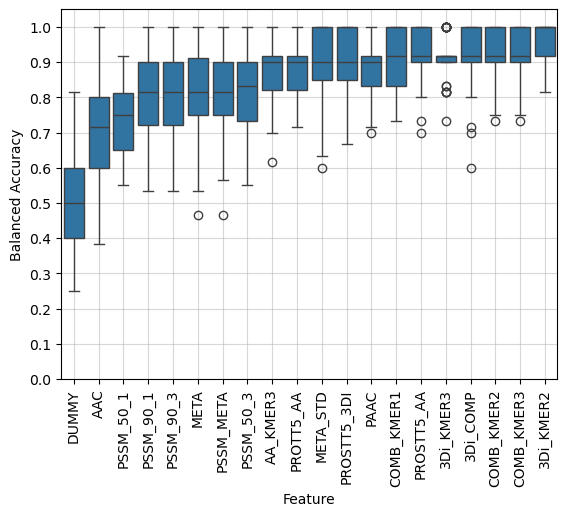

In [14]:
plot_results_long(
    df_results_long=df_results_long,
    output_folder_path=RESULTS_FOLDER,
    test_name=TEST_NAME,
    metrics_include = ["balanced_accuracy"]
)

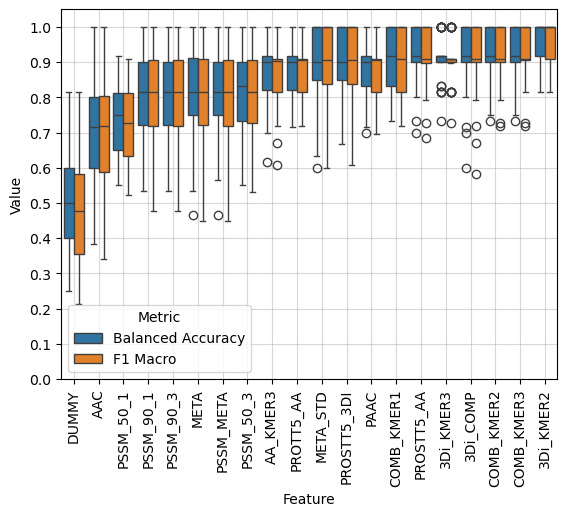

In [15]:
plot_results_long(
    df_results_long=df_results_long,
    output_folder_path=RESULTS_FOLDER,
    test_name=TEST_NAME,
    metrics_include = ["f1_macro", "balanced_accuracy"]
)